In [61]:
import numpy as np
import pandas as pd

#파이썬으로 차트들을 쉽게 그릴 수 있도록 도와주는 시각화 라이브러리
import matplotlib.pyplot as plt
#matplotlib을 기반으로 만들어진 통계 데이터 시각화 라이브러리
import seaborn as sns
import warnings

#시각화 내용 사이즈 설정
plt.rcParams['figure.figsize'] = [7,4]

#시각화 테마 결정
sns.set(style='whitegrid')
sns.set_palette('pastel')

#warning이 많이 뜨는데, 이를 무시함
warnings.filterwarnings('ignore')

In [3]:
# 한글이 깨지는 경우
from matplotlib import font_manager, rc
import platform
import matplotlib

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
#Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
print(tips.head())
print(tips.shape)
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)
<class 'pandas.core.frame.DataFrame'>


In [5]:
sum_tip_by_day = tips.groupby('day')['tip'].sum()
print(sum_tip_by_day)
print('-'*50)

#요일에 대한 리스트 및 이에 대한 인덱스 생성
x_label = ['Thur','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))
print(x_label_index)

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64
--------------------------------------------------
[0 1 2 3]


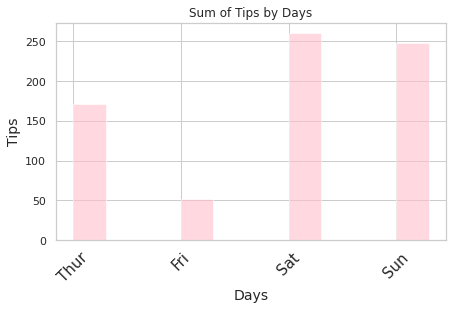

In [62]:
x_label = ['Thur','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))

#Bar
#기본: (x축,y축)
plt.bar(x_label,sum_tip_by_day,
        color='pink', #색상
        alpha=0.6,    #투명도
        width= 0.3,   #그래프 너비
        align='edge') #배치
plt.title('Sum of Tips by Days')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Tips',fontsize=14)

plt.xticks(rotation=45,   #글자 회전각도
           fontsize=15)   #글자크기
plt.show()

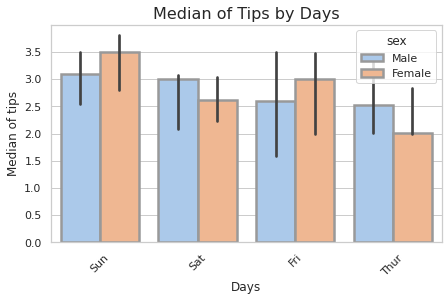

In [63]:
#seaborn을 활용한 시각화

#데이터 프레임에서 따로 변수 지정을 통해 x,y를 지정하지 않아도
#바로 가져올 수 있음
sns.barplot(data=tips, #DataFrame
            x='day',   #DataFrame에서 x로 지정하고 싶은 컬럼
            y='tip',   #DataFrame에서 y로 지정하고 싶은 컬럼
            estimator = np.median, #y에 대해표시할 내용(sum, median...)
            hue='sex', #추가 변수 설정(색깔 별로 구분)
            order=['Sun','Sat','Fri','Thur'], #x ticks 순서
            edgecolor='.6', #모서리 선명도
            linewidth=2.5)  #모서리 두께

plt.title('Median of Tips by Days',fontsize=16)
plt.xlabel('Days')
plt.ylabel('Median of tips')
plt.xticks(rotation=45)
plt.show()

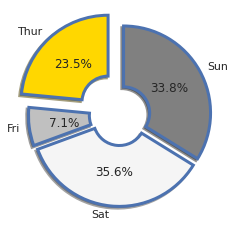

In [64]:
#Pie 차트
sum_tip_by_day = tips.groupby('day')['tip'].sum()

#Pie차트는 비율을 표시하므로 비율을 정해줘야함
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()

x_label=['Thur','Fri','Sat','Sun']

plt.pie(ratio_tip_by_day, #비율 값 (먼저 넣어줘야함)
        labels=x_label,  #라벨값
        autopct='%.1f%%',#부채꼴 안에 표시될 숫자 .1f->소수점 한자리까지 실수 표시
        startangle=90,   #축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순, False: 반시계방향
        explode=[0.2,0.05,0.05,0.05], #중심에서 벗어나는 정도
        shadow=True, #그림자 표시 여부
        colors=['gold','silver','whitesmoke','gray'],
        wedgeprops={'width':0.7,'edgecolor':'b','linewidth':3}) #도넛 모양

plt.show()

In [50]:
#Line 차트
#예제를 위해 데이터에 가상 시간 컬럼 추가

sun_tips = tips[tips['day']=='Sun']

import datetime
date = []
today = datetime.date.today()

                  #행개수(데이터 개수)
for time in range(sun_tips.shape[0]):
    date.append(today)
    today += datetime.timedelta(1) #하루씩 추가

sun_tips['date'] = date
sun_tips.head()

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-02-13
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-02-14
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-02-15
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-02-16
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-02-17


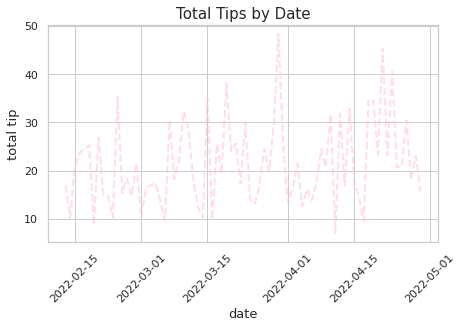

In [70]:
#line chart(matplob)
plt.plot(sun_tips['date'],
         sun_tips['total_bill'],
         linestyle='--', #라인 모양
         linewidth=2,    #라인 두께
         color='pink',   #라인 색
         alpha=0.5)      #라인 투명도

plt.title('Total Tips by Date',fontsize=15)
plt.xlabel('date',fontsize=13)
plt.ylabel('total tip',fontsize=13)
plt.xticks(rotation=45)

plt.show()

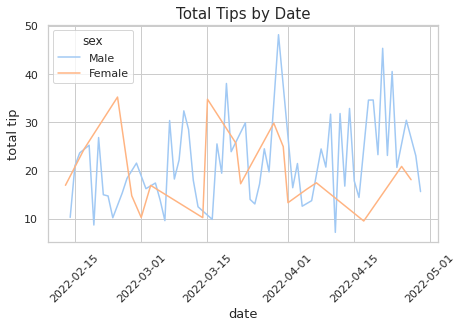

In [76]:
#seaborn
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             color='green',
             hue='sex'
             )


plt.title('Total Tips by Date',fontsize=15)
plt.xlabel('date',fontsize=13)
plt.ylabel('total tip',fontsize=13)
plt.xticks(rotation=45)
plt.show()